# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -134.97,
        "lat": -23.12
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "base": "model",
    "main": {
        "temp": 78.55,
        "feels_like": 78.3,
        "temp_min": 78.55,
        "temp_max": 78.55,
        "pressure": 1017,
        "humidity": 79,
        "sea_level": 1017,
        "grnd_level": 1017
    },
    "wind": {
        "speed": 15.37,
        "deg": 87
    },
    "rain": {
        "3h": 0.44
    },
    "clouds": {
        "all": 0
    },
    "dt": 1579382584,
    "sys": {
        "country": "PF",
        "sunrise": 1579357752,
        "sunset": 1579405848
    },
    "timezone": -32400,
    "id": 4030556,
    "name": "Rikitea",
    "cod": 200
}


In [4]:
# Include a print log of each city as it'sbeing processed (with the city number and city name)
city_name = []
city_id = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_id = response["id"]
        city_record = response ["name"]
        print(f"City Number {city_id} | City Name {city_record}")
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
City Number 3831208 | City Name Qaanaaq
City Number 3516376 | City Name Tamiahua
City Number 1819729 | City Name Hong Kong
City Number 2206939 | City Name Bluff
City Number 580577 | City Name Askino
City Number 6201424 | City Name Mataura
City Number 553766 | City Name Kamenka
City Number 1861416 | City Name Ishigaki
City Number 2208248 | City Name Kaitangata
City Number 3833367 | City Name Ushuaia
City Number 1635815 | City Name Maumere
City Number 5110365 | City Name Broome
City not found. Skipping...
City Number 5848280 | City Name Kapaa
City Number 3366880 | City Name Hermanus
City Number 3628473 | City Name San Cristobal
City Number 64814 | City Name Bandarbeyla
City Number 4946620 | City Name Palmer
City Number 3418910 | City Name Upernavik
City Number 108648 | City Name Qurayyat
City Number 3369157 | City Name Cape Town
City Number 3985168 | City Name San Patricio
City Number 1153035 | City Name Kathu
City Number 5557293 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)

In [6]:
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,1579382879,77.48,-69.36,-17.09,66,75,4.25
1,Tamiahua,MX,1579383432,21.27,-97.45,74.23,86,11,6.42
2,Hong Kong,HK,1579382665,22.29,114.16,66.20,72,20,5.82
3,Bluff,NZ,1579382866,-46.60,168.33,59.00,94,98,1.01
4,Askino,RU,1579383433,56.09,56.58,22.05,97,91,5.88


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

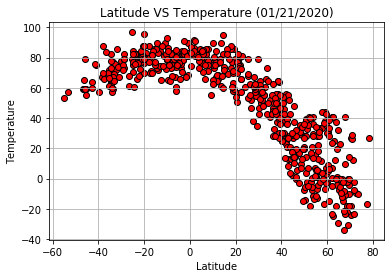

In [20]:
plt.scatter(latitude, max_temperature, marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude VS Temperature (01/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

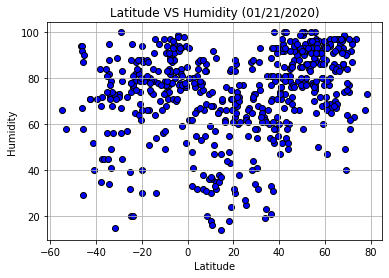

In [21]:
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude VS Humidity (01/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("../Images/lat_vs_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

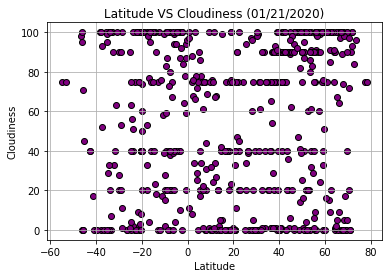

In [22]:
plt.scatter(latitude, cloudiness, marker="o", facecolors="purple", edgecolors="black")
plt.title("Latitude VS Cloudiness (01/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

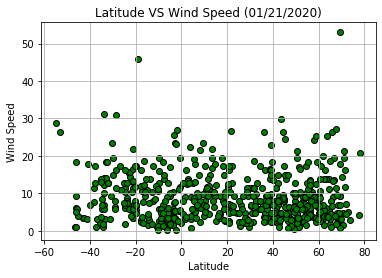

In [23]:
plt.scatter(latitude, wind_speed, marker="o", facecolors="green", edgecolors="black")
plt.title("Latitude VS Wind Speed (01/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
north_hemisphere = weather_data.loc[(weather_data['Latitude'] > 0)]
north_hemisphere

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,1579382879,77.48,-69.36,-17.09,66,75,4.25
1,Tamiahua,MX,1579383432,21.27,-97.45,74.23,86,11,6.42
2,Hong Kong,HK,1579382665,22.29,114.16,66.20,72,20,5.82
4,Askino,RU,1579383433,56.09,56.58,22.05,97,91,5.88
6,Kamenka,RU,1579383243,51.32,42.77,33.01,95,100,1.01
...,...,...,...,...,...,...,...,...,...
559,Lensk,RU,1579426750,60.73,114.93,6.21,93,100,8.81
561,Jumla,NP,1579426750,29.27,82.18,35.11,58,0,2.86
562,Vuktyl,RU,1579426750,63.86,57.31,0.07,97,91,3.67
564,Bardiyah,LY,1579426751,31.76,25.09,57.54,75,61,18.50


In [36]:
south_hemisphere = weather_data.loc[(weather_data['Latitude'] <= 0)]
south_hemisphere

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
3,Bluff,NZ,1579382866,-46.60,168.33,59.00,94,98,1.01
5,Mataura,NZ,1579382952,-46.19,168.86,59.00,94,95,1.01
8,Kaitangata,NZ,1579382891,-46.28,169.85,64.99,67,0,9.24
9,Ushuaia,AR,1579383241,-54.80,-68.30,53.60,66,75,28.86
10,Maumere,ID,1579382990,-8.62,122.21,77.38,83,100,4.70
...,...,...,...,...,...,...,...,...,...
549,Otuzco,PE,1579426747,-7.90,-78.58,68.00,88,40,4.70
556,Henties Bay,NA,1579426749,-22.12,14.28,68.00,84,100,4.00
557,Ladybrand,ZA,1579426749,-29.19,27.46,71.60,56,20,5.82
560,Dunedin,NZ,1579426750,-45.87,170.50,59.00,87,71,5.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: -0.879717223025031


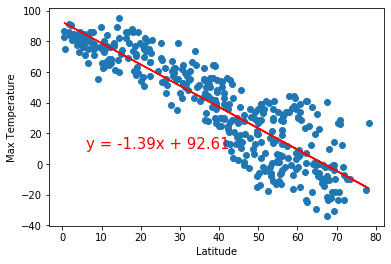

In [76]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"R squared: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.48923067933119024


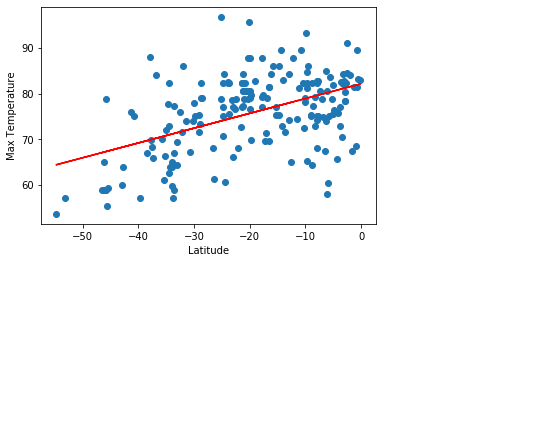

In [77]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"R squared: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.4849360570309881


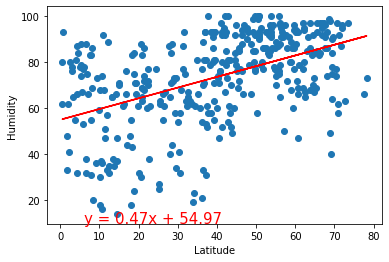

In [78]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R squared: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.31751491538180476


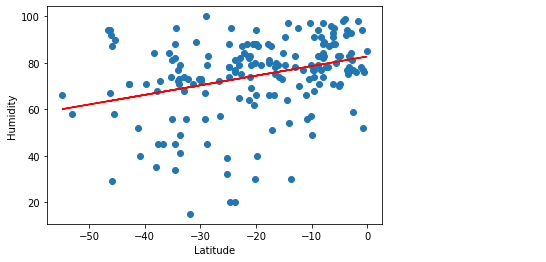

In [79]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"R squared: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.2228962148674606


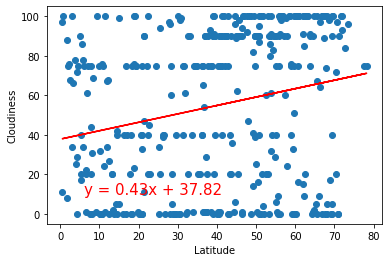

In [80]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"R squared: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.11807343325795154


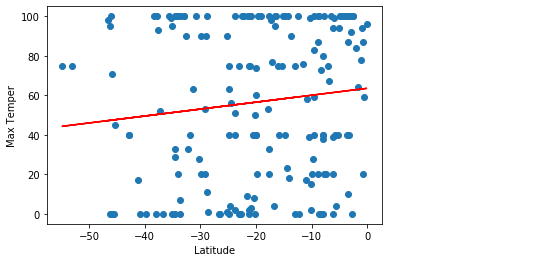

In [82]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temper')
print(f"R squared: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: -0.011993389812131414


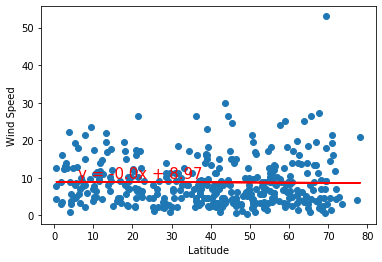

In [83]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R squared: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: -0.1443208081936726


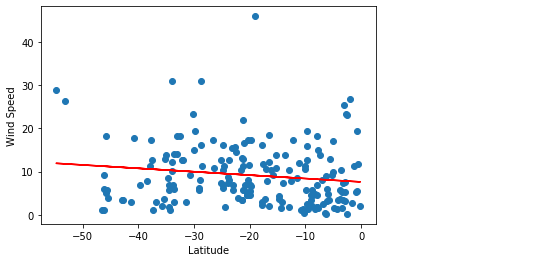

In [84]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"R squared: {rvalue}")
plt.show()